In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
data_nb=pd.read_csv("Breast_cancer_data.csv")
data_nb.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


array([[<Axes: title={'center': 'mean_radius'}>,
        <Axes: title={'center': 'mean_texture'}>],
       [<Axes: title={'center': 'mean_perimeter'}>,
        <Axes: title={'center': 'mean_area'}>],
       [<Axes: title={'center': 'mean_smoothness'}>,
        <Axes: title={'center': 'diagnosis'}>]], dtype=object)

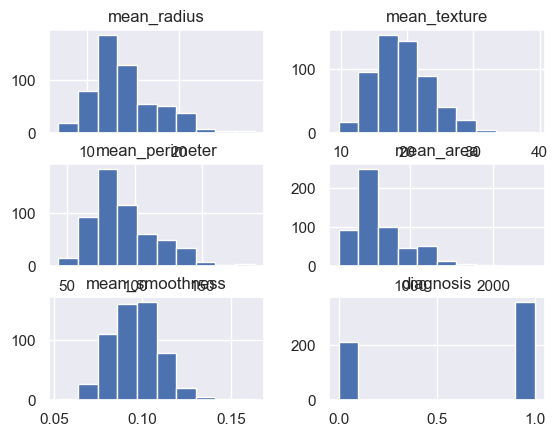

In [6]:
data_nb.hist()

<Axes: >

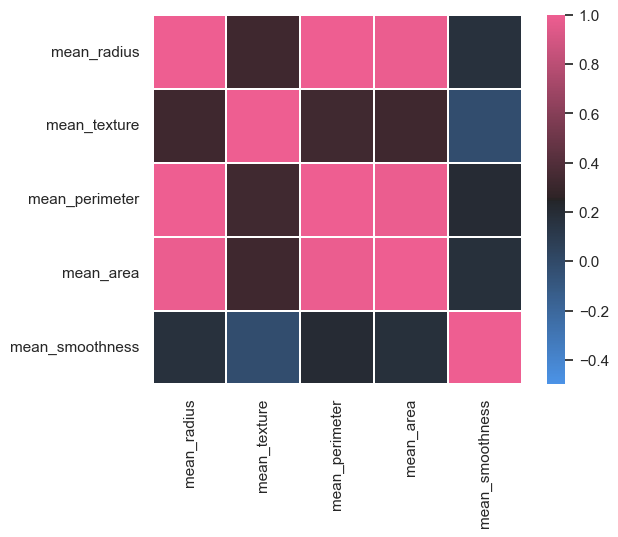

In [10]:
corr=data_nb.iloc[:,:-1].corr(method='pearson')
cmap=sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr,vmax=1,vmin=-.5,cmap=cmap,square=True,linewidths=.2)

In [15]:
data_cleaned=data_nb[['mean_radius','mean_texture','mean_smoothness','diagnosis']]
data_cleaned.head()

,mean_radius,mean_texture,mean_smoothness,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0


<Axes: xlabel='mean_texture', ylabel='Count'>

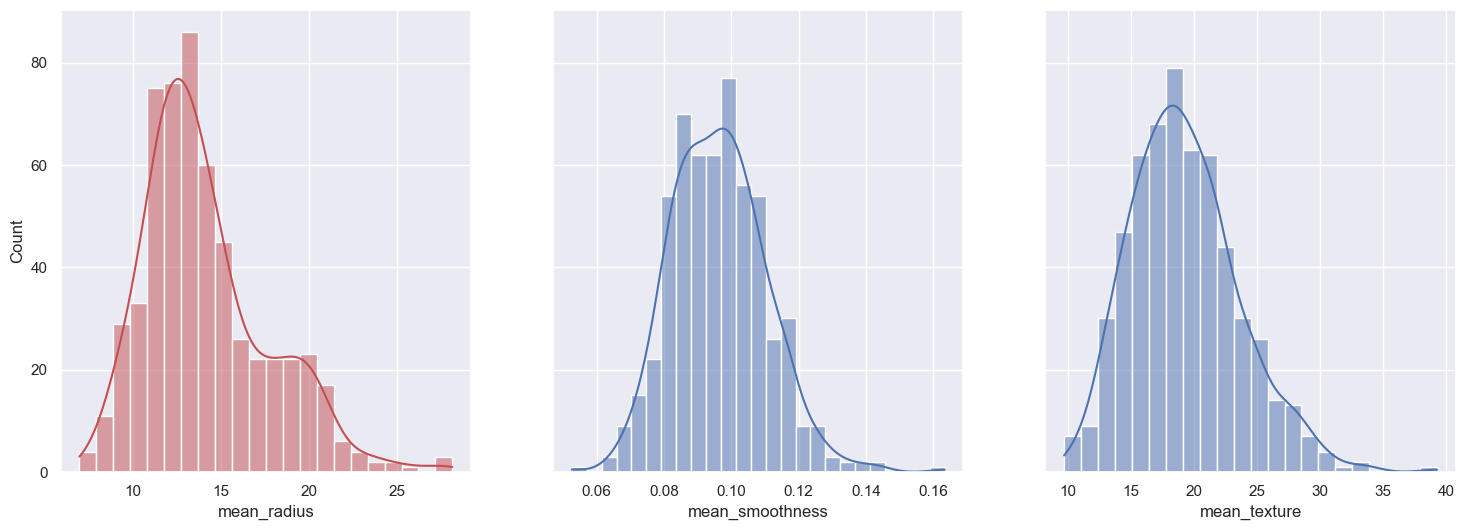

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(data_cleaned, ax=axes[0], x="mean_radius", kde=True, color='r')
sns.histplot(data_cleaned, ax=axes[1], x="mean_smoothness", kde=True, color='b')
sns.histplot(data_cleaned, ax=axes[2], x="mean_texture", kde=True)

In [49]:
# First we calculate prior
def calculate_prior(data_cleaned, Y):
    classes = sorted(list(data_cleaned[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(data_cleaned[data_cleaned[Y]==i]) / len(data_cleaned))
    return prior

In [50]:
#calculating conditional probability using Gaussian Bayes Distribution
def calculate_gaussian_distribution(data_cleaned, feature_name, feature_value, Y, label):
    data_cleaned = data_cleaned[data_cleaned[Y] == label]
    mean, std = data_cleaned[feature_name].mean(), data_cleaned[feature_name].std()
    # Gaussian Distribution Formula
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-((feature_value - mean) ** 2) / (2 * std ** 2))
    return p_x_given_y

In [51]:
def naive_bayes_gaussian(data_cleaned, X, Y):
    features = data_cleaned.iloc[:, :-1]
    prior = calculate_prior(data_cleaned, Y)
    Y_pred = []
    
    # Sampling over each data point
    for x in X:
        labels = sorted(list(data_cleaned[Y].unique()))
        likelihood = [1] * len(labels)
        
        # Calculate likelihood for each label
        for j, label in enumerate(labels):
            for i, feature in enumerate(features):
                likelihood[j] *= calculate_gaussian_distribution(data_cleaned, feature, x[i], Y, label)
                
        # Calculate posterior probability for each label
        post_prob = [likelihood[j] * prior[j] for j in range(len(labels))]
        
        # Predict the label with maximum posterior probability
        Y_pred.append(np.argmax(post_prob))
    
    return np.array(Y_pred)
                

In [53]:
from sklearn.model_selection import train_test_split
train, test=train_test_split(data_cleaned, test_size=.2, random_state=42)
X_test = test.iloc[:, :-1].values
Y_test = test["diagnosis"].values
Y_pred = naive_bayes_gaussian(train, X=X_test, Y="diagnosis")
from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test,Y_pred))
print(f1_score(Y_test,Y_pred))


[[39  4]
 [ 2 69]]
0.9583333333333334


In [56]:
print(calculate_prior(data_cleaned,)

TypeError: calculate_prior() missing 2 required positional arguments: 'data_cleaned' and 'Y'